# concrete strength test prediction

The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. The strength of the concrete
is also a vital aspect in achieving the requisite longevity. It will take 28 days to test
strength, which is a long period. So, what will we do now? We can save a lot of time and
effort by using Data Science to estimate how much quantity of which raw material we
need for acceptable compressive strength.

In [2]:
pip install pandas

^C
Note: you may need to restart the kernel to use updated packages.


**Approach:** The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignoring warnings
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
from platform import python_version

print(python_version())

3.9.12


In [4]:
!pip install xlrd

     -------------------------------------- 96.5/96.5 kB 690.3 kB/s eta 0:00:00


In [5]:
# loading the dataset

df=pd.read_excel('concrete_data.xls')

In [6]:
df.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [7]:
# Changing coulmns name for ease of use
df.columns=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','age','label']

In [34]:
# understanding data description

df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,age,label
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Feature Engineering

**1.NaN Value Detection***

In [8]:
df.shape

(1030, 9)

In [9]:
# cHECKING FOR NAN VALUE

df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
age                   0
label                 0
dtype: int64

In [10]:
# Count number of zeros in all columns of Dataframe
for i in df.columns:
    column = df[i]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', i, ' is : ', count)

Count of zeros in column  Cement  is :  0
Count of zeros in column  Blast Furnace Slag  is :  466
Count of zeros in column  Fly Ash  is :  566
Count of zeros in column  Water  is :  0
Count of zeros in column  Superplasticizer  is :  379
Count of zeros in column  Coarse Aggregate  is :  0
Count of zeros in column  Fine Aggregate  is :  0
Count of zeros in column  age  is :  0
Count of zeros in column  label  is :  0


**Observation:**

* This Data set does not contain any Nan value.

* Although in 3 features arount 30-50% value have 0

* I will not remove zeros as, here zero means that quantity of those items are not used in the concrete mixture

**2.Outliers Detection using Visualization**

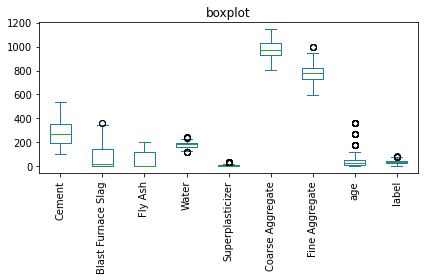

In [11]:
# plotting box plot

# Set the figure size
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df.plot(kind='box', title='boxplot')
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Observation:**

* From above box plot it is clear that few of the features have outliers present in it

* I will use IQR Method to remove outliers

**3.Removing outliers using IQR**

In [12]:
for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    df=df[(df[i]>lower_bound) & (df[i]<upper_bound)]

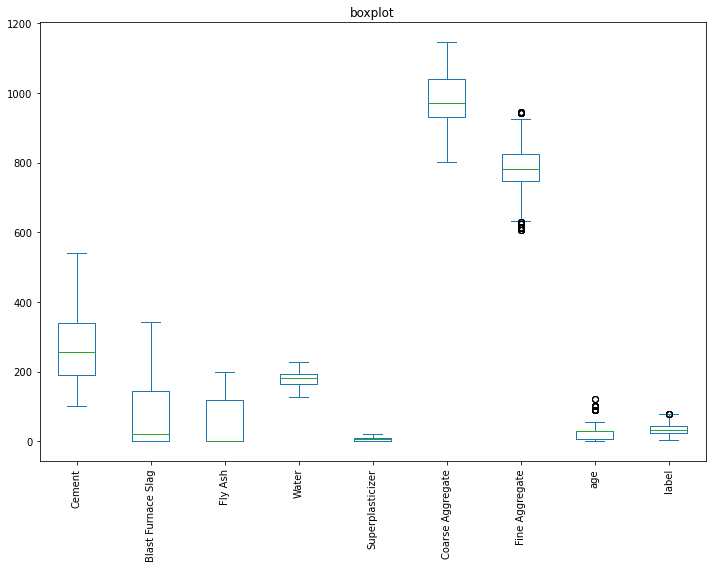

In [113]:
#plotting BOX PLOT after removal of outliers


# Set the figure size
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df.plot(kind='box', title='boxplot')
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Statistical Analysis

In [114]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,age,label
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,274.228456,73.364093,58.958315,179.849784,6.346766,975.501350,779.507127,32.225702,34.875480
std,101.456549,86.341209,64.454076,17.895732,5.323600,78.080334,71.961238,28.412480,16.716451
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,605.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,746.600000,7.000000,22.448994
50%,255.000000,20.000000,0.000000,182.700000,7.000000,970.700000,780.195000,28.000000,33.398217
75%,339.150000,145.000000,118.600000,192.000000,10.370000,1039.500000,824.000000,28.000000,45.084836
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,79.400056


**Visualization of data**

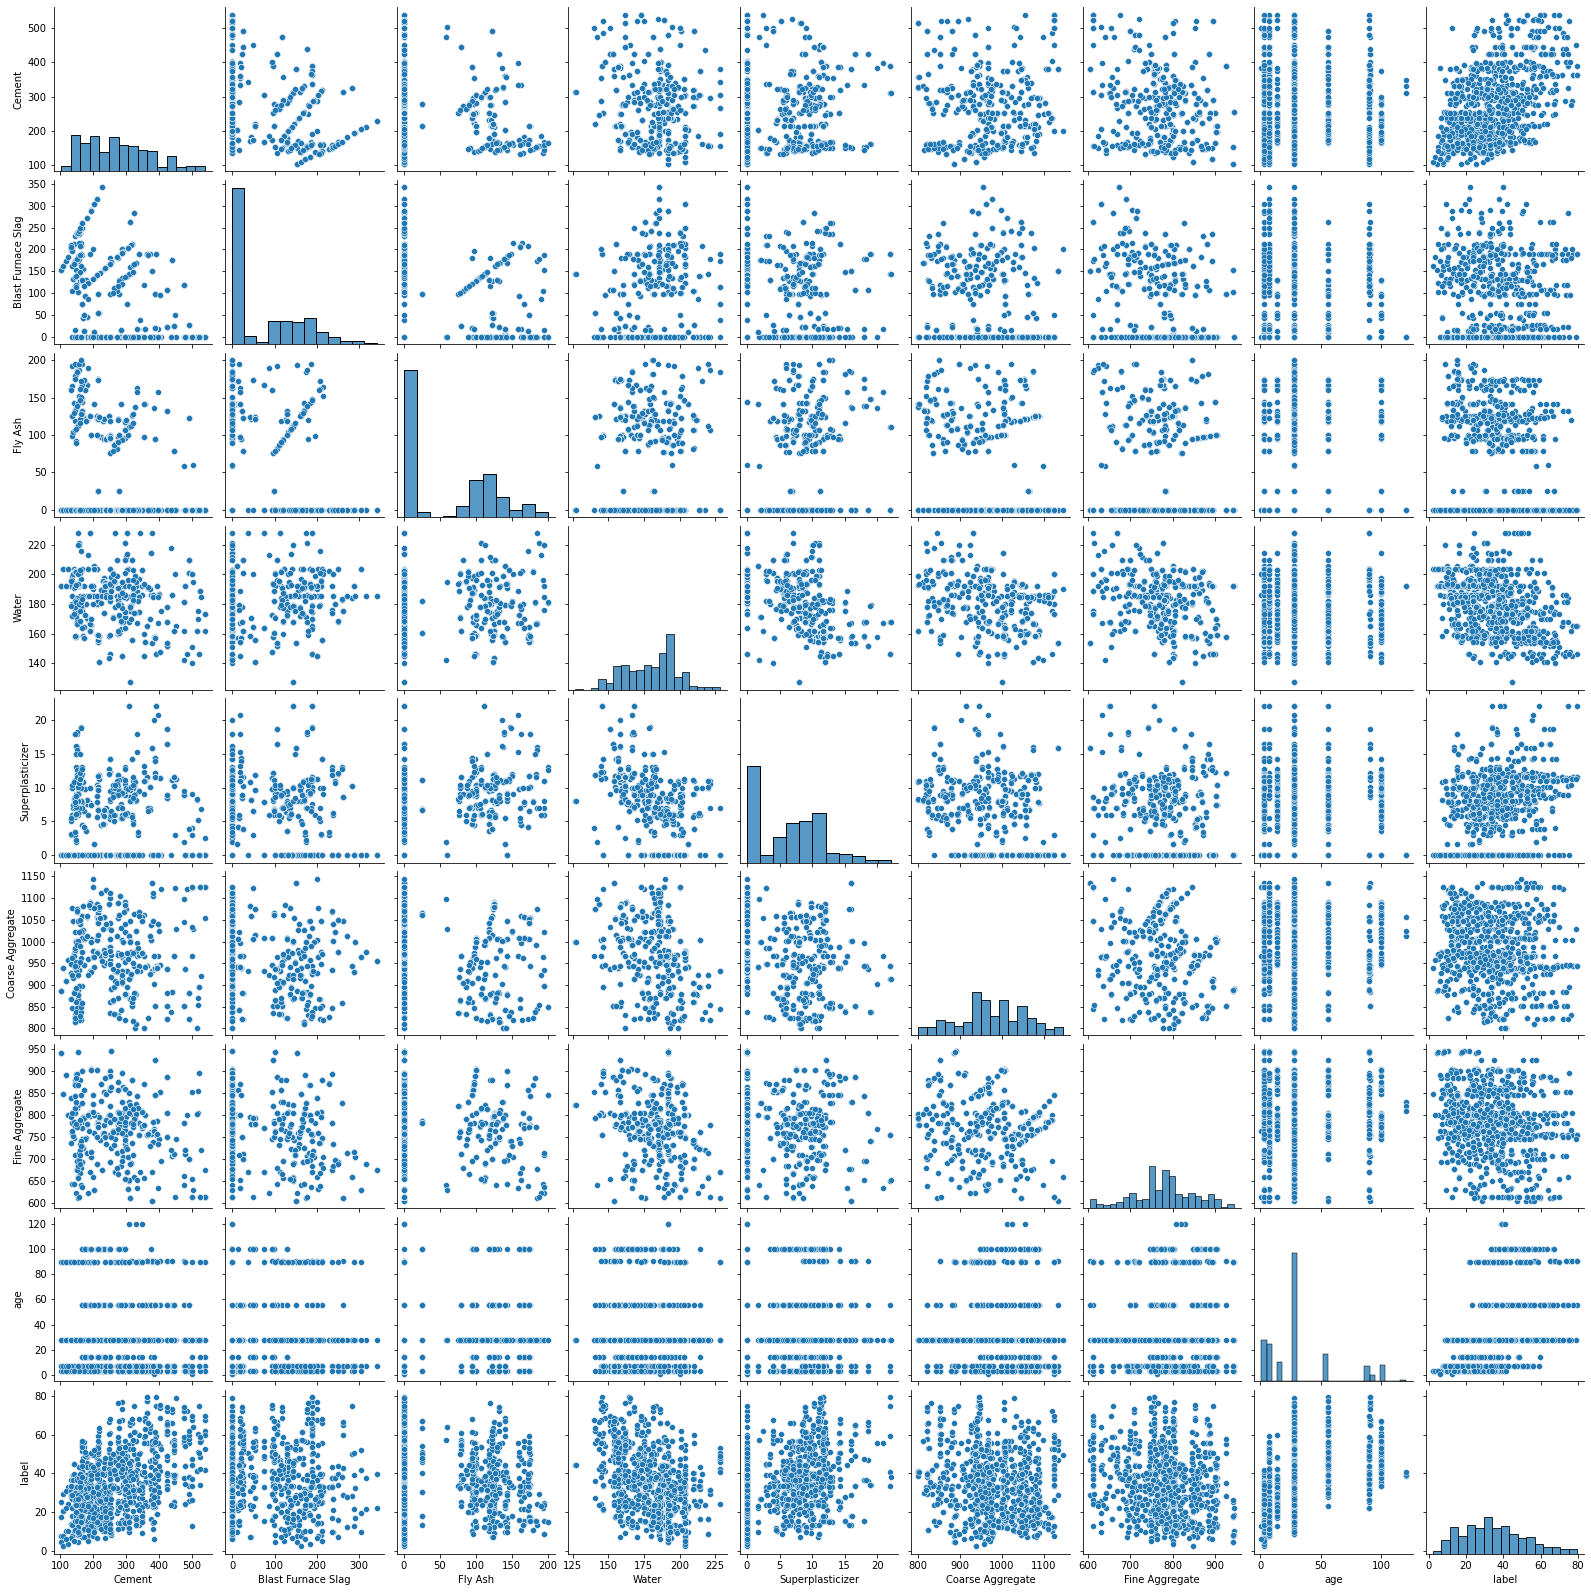

In [118]:
#plotting to see how data are scattered

sns.pairplot(df)

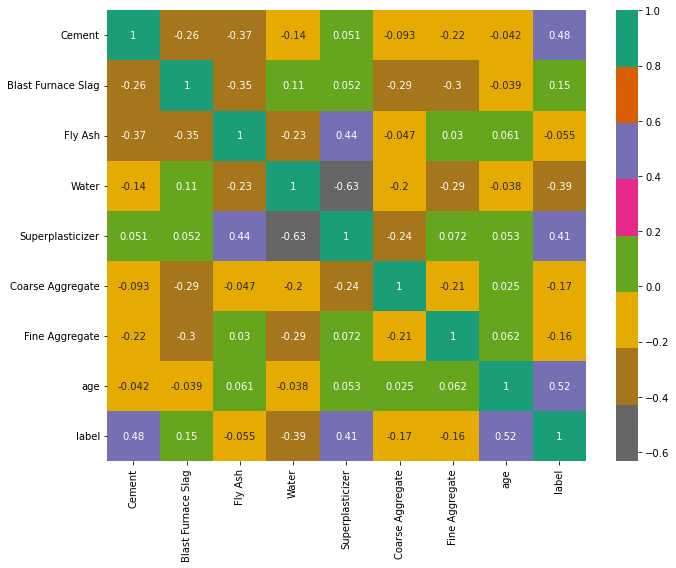

In [117]:
#pltotting co-realtion of features on heatmap

plt.figure(figsize=(10,8))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='Dark2_r'
)
plt.show()

**Observation:**

*1. Pairplot gives an idea how our data was spreaded*

*2. Heat map showed how features are co-realted*

*3. It can be seen from the heatmap majority of features are negatively co-related to each other*

*4. while few shows postive co-realtion.*

*5. This can be used to drop few features*

# Model Building

In [13]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 824.8 kB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 kB 791.2 kB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d5c30fb298b6981c4d54c40de820fd20b26463c5d6620ab39a008e6cb89d9c71
  Stored in directory: c:\users\ashad amjad\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
#selecting Independent and dependant features

X=df.drop('label',axis=1)
y=df['label']

In [16]:
# splitting the data into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [194]:
models = [LogisticRegression(), SVC(), AdaBoostRegressor(), RandomForestRegressor(), 
          DecisionTreeRegressor(), KNeighborsRegressor()]

model_labels = ['LogisticReg.','SVC','AdaBoost','RandomForest','DecisionTree','KNN']
mean_validation_r2_scores = []

for model in models:

    data_pipeline = Pipeline(steps = [('scalar1',StandardScaler()),
                                      ('pca1',PCA(n_components=4)),
                                      ('model', model)
                                      
                                      
    ])
    mean_validation_r2 = cross_val_score(data_pipeline, X, y, cv=KFold(n_splits=10), scoring='r2',n_jobs=-1).mean()
    mean_validation_r2_scores.append(mean_validation_r2)

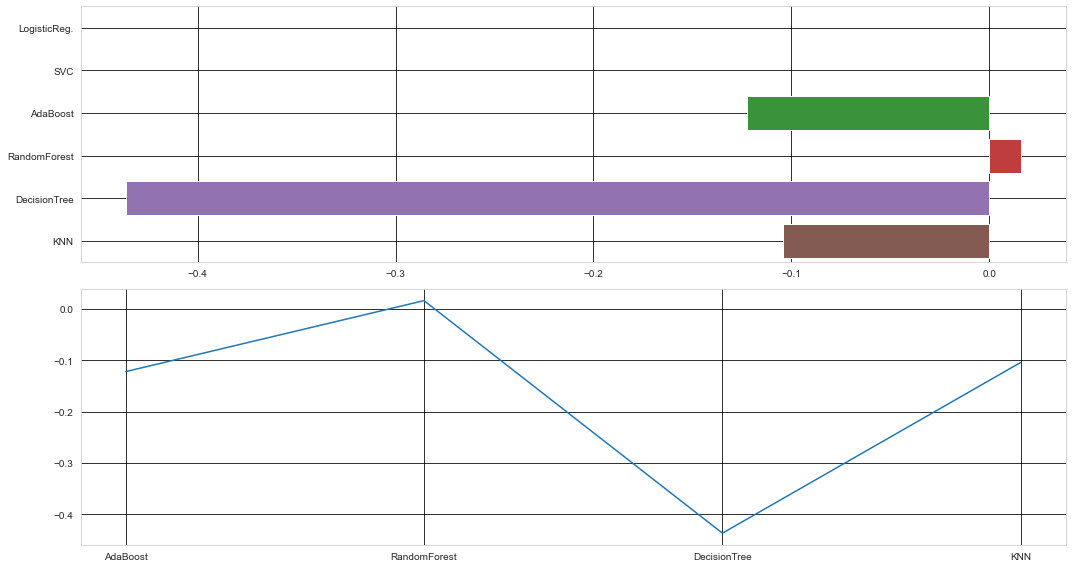

In [195]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,8))

sns.set_style('dark')
sns.barplot(y = model_labels ,x = mean_validation_r2_scores, ax=axes[0])
axes[0].grid(True, color='k')

sns.set_style('whitegrid')
sns.lineplot(x = model_labels, y = mean_validation_r2_scores)
axes[1].grid(True, color='k')
fig.show()

In [17]:
pipeline_ada=Pipeline([('scalar1',StandardScaler()),
                     
                     ('lr_classifier',AdaBoostRegressor(random_state=0))])

In [18]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     
                     ('dt_classifier',DecisionTreeRegressor())])

In [19]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     
                     ('rf_classifier',RandomForestRegressor(random_state=0))])

In [20]:
## LEts make the list of pipelines
pipelines = [pipeline_ada, pipeline_dt, pipeline_randomforest]

In [21]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [22]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'ADA', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [23]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

ADA Test Accuracy: 0.7901008999470731
Decision Tree Test Accuracy: 0.8676311927111766
RandomForest Test Accuracy: 0.9101427327568238


In [24]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


In [25]:
# Create a pipeline
pipe = Pipeline([ ('scalar1',StandardScaler()),
                  ("classifier", RandomForestRegressor())
                 
                ])
                
                
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [ 
                 {"classifier": [RandomForestRegressor()],
                  
                 "classifier__n_estimators": [185],
                 "classifier__max_depth":[9],
                 "classifier__min_samples_leaf":[10,15],
                 "classifier__max_leaf_nodes": [80,90,95,100],
                  "classifier__max_features":  ["auto", "sqrt", "log2"]
                 }
            
              ]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=KFold(n_splits=10),verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [26]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('scalar1', StandardScaler()),
                ('classifier',
                 RandomForestRegressor(max_depth=9, max_features='auto',
                                       max_leaf_nodes=100, min_samples_leaf=10,
                                       n_estimators=185))])
The mean accuracy of the model is: 0.8430034872574337


In [27]:
# Creating pipeline with new parameters after optained from gridsearchcv
data_pipeline = Pipeline(steps = [
                                  ('scaler',StandardScaler()),
                                  
                                  ('model',RandomForestRegressor(max_depth=9, max_leaf_nodes=90,
                                                                 min_samples_leaf=10,
                                                                 n_estimators=185,
                                                                 random_state=0
                                                                ))
                                 ]) 

In [28]:
r2_scores = cross_val_score(data_pipeline, X, y, scoring='r2', cv=KFold(n_splits=10), n_jobs=-1)
print('max r2 :', r2_scores.max())
print('min r2 :', r2_scores.min())
print('mean r2 :', r2_scores.mean())

max r2 : 0.8791483216192608
min r2 : 0.47982902888929024
mean r2 : 0.6993487151002669


In [29]:
pipeline_randomforest.fit(X_train, y_train)
predict_comressive_strength= pipeline_randomforest.predict(X_test)

In [30]:
r2_score(predict_comressive_strength,y_test)

0.8886860364644152

In [31]:
mean_squared_error(predict_comressive_strength,y_test)

25.014007063248794

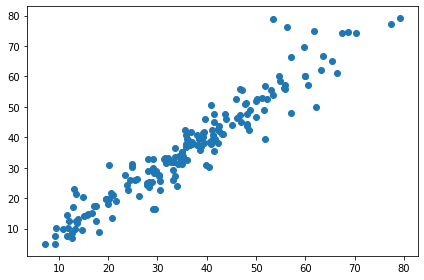

In [32]:
plt.scatter(predict_comressive_strength,y_test)

# Model Saving

In [33]:
import pickle

In [34]:
# Opeining a file in 'write bytes' mode
with open('model_pickle', 'wb') as file:
    pickle.dump(pipeline_randomforest, file)

In [35]:
# Opeining a file in 'read bytes' mode
with open('model_pickle', 'rb') as file:
    mp = pickle.load(file)

In [36]:
mp.predict([[260.9,100.5,78.3,200.6,8.6,864.5,761.5,28]])

array([34.77361174])

In [23]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
